In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D


In [48]:

def plot_time_vs_params(results): # ppt = param_crypto

    params = results["params"].unique()
    
    matrix_sizes = results["matrix_size"].unique()

    fig, axes = plt.subplots(3) # ncols = nombre de tailles de matrice
    # plt.rcParams.update({'font.size': 23})

 
    for m_index, matrix_size in enumerate(matrix_sizes): # à enlever 

        matrix_results = results[results["matrix_size"] == matrix_size]

        # print(matrix_results)
        matrix_results_per_param = matrix_results.groupby(["params"])["time"].mean()
        matrix_results_per_param = matrix_results_per_param.reset_index()

        print(matrix_results_per_param)
        print(matrix_results_per_param.info())

        axes[m_index].plot(matrix_results_per_param["params"], matrix_results_per_param["time"])
        axes[m_index].set_xticks([4, 8, 16])



    plt.show()




def plot_time_vs_matrix_size(results): # ppt = param_crypto

    params = results["para"].unique()
    
    matrix_sizes = results["matrix_size"].unique()

    fig, axes = plt.subplots(3) # ncols = nombre de tailles de matrice
    # plt.rcParams.update({'font.size': 23})

 
    for m_index, param_i in enumerate(params): # à enlever 

        param_results = results[results["para"] == param_i]

        # print(matrix_results)
        param_per_matrix_size = param_results.groupby(["matrix_size"])["time"].mean()
        param_per_matrix_size = param_per_matrix_size.reset_index()

        print(param_per_matrix_size)
        print(param_per_matrix_size.info())

        axes[m_index].plot(param_per_matrix_size["matrix_size"], param_per_matrix_size["time"])
        axes[m_index].set_xticks([2, 3, 4])



    plt.show()






def plot_time_vs_matrix_size_comp(results1, results2):


    

    params1 = results1["params"].unique()
    params2 = results2["params"].unique()


    params1 = params1[params1 != 64]
    params2 = params2[params2 != 64] 
    
    matrix_sizes1 = results1["matrix_size"].unique()
    matrix_sizes2 = results2["matrix_size"].unique()

    fig, axes = plt.subplots(1,len(params1),figsize=(15, 4)) # ncols = nombre de tailles de matrice
    # plt.rcParams.update({'font.size': 23})


    min_y = float('inf')
    max_y = float('-inf')

    
    for m_index, param_i in enumerate(params1): # à enlever 

        param_results1 = results1[results1["params"] == param_i]
        param_results2 = results2[results2["params"] == param_i]


        average_param_per_matrix_size = param_results1.groupby(["matrix_size"])["time"].mean()
        average_param_per_matrix_size = average_param_per_matrix_size.reset_index()


        min_param_per_matrix_size = param_results1.groupby(["matrix_size"])["time"].min()
        min_param_per_matrix_size = min_param_per_matrix_size.reset_index()


        max_param_per_matrix_size = param_results1.groupby(["matrix_size"])["time"].max()
        max_param_per_matrix_size = max_param_per_matrix_size.reset_index()

        min_y = min(min_y, min_param_per_matrix_size["time"].min())
        max_y = max(max_y, max_param_per_matrix_size["time"].max())

        axes[m_index].plot(average_param_per_matrix_size["matrix_size"], average_param_per_matrix_size["time"],color="#fc8d62",label="BMA leaky")
        axes[m_index].fill_between(average_param_per_matrix_size["matrix_size"], min_param_per_matrix_size["time"],max_param_per_matrix_size["time"],color='#fc8d62', alpha=0.3, )
        axes[m_index].set_xticks(matrix_sizes1)
        # axes[m_index].legend()

        average_param_per_matrix_size = param_results2.groupby(["matrix_size"])["time"].mean()
        average_param_per_matrix_size = average_param_per_matrix_size.reset_index()


        min_param_per_matrix_size = param_results2.groupby(["matrix_size"])["time"].min()
        min_param_per_matrix_size = min_param_per_matrix_size.reset_index()


        max_param_per_matrix_size = param_results2.groupby(["matrix_size"])["time"].max()
        max_param_per_matrix_size = max_param_per_matrix_size.reset_index()


        min_y = min(min_y, min_param_per_matrix_size["time"].min())
        max_y = max(max_y, max_param_per_matrix_size["time"].max())

        axes[m_index].plot(average_param_per_matrix_size["matrix_size"], average_param_per_matrix_size["time"],color="#66c2a5",label="BMA robust")
        axes[m_index].fill_between(average_param_per_matrix_size["matrix_size"], min_param_per_matrix_size["time"],max_param_per_matrix_size["time"],color='#66c2a5', alpha=0.3, )
        axes[m_index].set_xticks(matrix_sizes2)
        axes[m_index].set_xlabel("Matrix size")
        # axes[m_index].set_ylabel("Time (in ms)")
        axes[m_index].legend()
        axes[m_index].set_title("Plaintext Size = "+str(param_i))
    
    for ax in axes:
            ax.set_ylim(0,2500)

    
    fig.text(0.005, 0.5, "Time (in ms)", va='center', ha='center', rotation='vertical')
    plt.tight_layout()
    plt.show()




def plot_time_vs_params_comp(results1, results2):





    params1 = results1["params"].unique()
    params2 = results2["params"].unique()
    
    matrix_sizes1 = results1["matrix_size"].unique()
    matrix_sizes2 = results2["matrix_size"].unique()

    matrix_sizes1 = matrix_sizes1[matrix_sizes1 != 6]
    matrix_sizes2 = matrix_sizes2[matrix_sizes2 != 6]  

    fig, axes = plt.subplots(1,len(matrix_sizes1),figsize=(15, 4)) # ncols = nombre de tailles de matrice
    # plt.rcParams.update({'font.size': 23})
    min_y = float('inf')
    max_y = float('-inf')

    
    for m_index, matrix_size_i in enumerate(matrix_sizes1): # à enlever 

        param_results1 = results1[results1["matrix_size"] == matrix_size_i]
        param_results2 = results2[results2["matrix_size"] == matrix_size_i]


        average_param_per_matrix_size = param_results1.groupby(["params"])["time"].mean()
        average_param_per_matrix_size = average_param_per_matrix_size.reset_index()


        min_param_per_matrix_size = param_results1.groupby(["params"])["time"].min()
        min_param_per_matrix_size = min_param_per_matrix_size.reset_index()


        max_param_per_matrix_size = param_results1.groupby(["params"])["time"].max()
        max_param_per_matrix_size = max_param_per_matrix_size.reset_index()


        min_y = min(min_y, min_param_per_matrix_size["time"].min())
        max_y = max(max_y, max_param_per_matrix_size["time"].max())

        axes[m_index].plot(average_param_per_matrix_size["params"], average_param_per_matrix_size["time"],color="#fc8d62", label="BMA leaky")
        axes[m_index].fill_between(average_param_per_matrix_size["params"], min_param_per_matrix_size["time"],max_param_per_matrix_size["time"],color='#fc8d62', alpha=0.3, )
        axes[m_index].set_xticks(params1)
        # axes[m_index].legend()


        






        average_param_per_matrix_size = param_results2.groupby(["params"])["time"].mean()
        average_param_per_matrix_size = average_param_per_matrix_size.reset_index()


        min_param_per_matrix_size = param_results2.groupby(["params"])["time"].min()
        min_param_per_matrix_size = min_param_per_matrix_size.reset_index()


        max_param_per_matrix_size = param_results2.groupby(["params"])["time"].max()
        max_param_per_matrix_size = max_param_per_matrix_size.reset_index()


        min_y = min(min_y, min_param_per_matrix_size["time"].min())
        max_y = max(max_y, max_param_per_matrix_size["time"].max())

        axes[m_index].plot(average_param_per_matrix_size["params"], average_param_per_matrix_size["time"],color="#66c2a5", label="BMA robust")
        axes[m_index].fill_between(average_param_per_matrix_size["params"], min_param_per_matrix_size["time"],max_param_per_matrix_size["time"],color='#66c2a5', alpha=0.3, )
        axes[m_index].set_xticks(params2)
        axes[m_index].set_xlabel("Plaintext size")
        # axes[m_index].set_ylabel("Time (in ms)")
        axes[m_index].legend()
        axes[m_index].set_title("Matrix Size = "+str(matrix_size_i))

    for ax in axes:
            ax.set_ylim(0,50000)

    
    fig.text(0.005, 0.5, "Time (in ms)", va='center', ha='center', rotation='vertical')
    plt.tight_layout()
    plt.show()

    
       

In [63]:

def plot_time_vs_matrix_size_comp_for_3_carry_0(results1, results2):


    

    params1 = results1["params"].unique()
    params2 = results2["params"].unique()
    # params1 = params1[params1 == 8]
    # params2 = params2[params2 == 8] 

    
    matrix_sizes1 = results1["matrix_size"].unique()
    matrix_sizes2 = results2["matrix_size"].unique()

    param_results1 = results1[results1["params"] == 8]
    param_results2 = results2[results2["params"] == 8]

    average_time_per_matrix_size_1 = param_results1.groupby(["matrix_size"])["time"].mean().reset_index()
    min_time_per_matrix_size_1 = param_results1.groupby(["matrix_size"])["time"].min().reset_index()
    max_time_per_matrix_size_1 = param_results1.groupby(["matrix_size"])["time"].max().reset_index()

    average_time_per_matrix_size_2 = param_results2.groupby(["matrix_size"])["time"].mean().reset_index()
    min_time_per_matrix_size_2 = param_results2.groupby(["matrix_size"])["time"].min().reset_index()
    max_time_per_matrix_size_2 = param_results2.groupby(["matrix_size"])["time"].max().reset_index()

    # Plots et fill_between pour le premier set de données
    min_y_1 = min(min_time_per_matrix_size_1["time"].min(), min_time_per_matrix_size_2["time"].min())
    max_y_1 = max(max_time_per_matrix_size_1["time"].max(), max_time_per_matrix_size_2["time"].max())

    plt.plot(average_time_per_matrix_size_1["matrix_size"], average_time_per_matrix_size_1["time"], color="#fc8d62", label="BMA revealing the number of rows")
    plt.fill_between(average_time_per_matrix_size_1["matrix_size"], min_time_per_matrix_size_1["time"], max_time_per_matrix_size_1["time"], color='#fc8d62', alpha=0.3)

    # Plots et fill_between pour le deuxième set de données
    plt.plot(average_time_per_matrix_size_2["matrix_size"], average_time_per_matrix_size_2["time"], color="#66c2a5", label="BMA revealing nothing")
    plt.fill_between(average_time_per_matrix_size_2["matrix_size"], min_time_per_matrix_size_2["time"], max_time_per_matrix_size_2["time"], color='#66c2a5', alpha=0.3)

    plt.xlabel("Number of rows")
    plt.ylabel("Time (in ms)")
    plt.legend(loc='lower right')
    plt.title("Message space size (p) = " + str(8))
    plt.ylim(0, max_y_1)

    # Définir un seul libellé à gauche de la figure, orienté verticalement
    # plt.text(-0.1, 0.5, "Time (in ms)", va='center', ha='center', rotation='vertical')

    plt.tight_layout()
    plt.show()


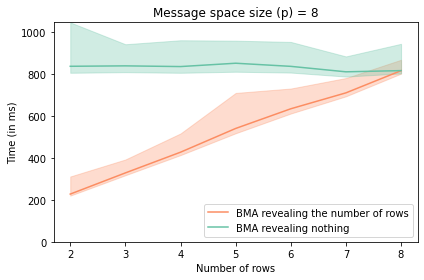

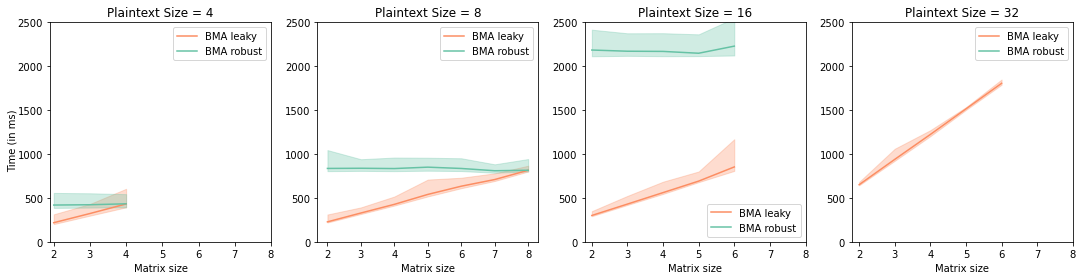

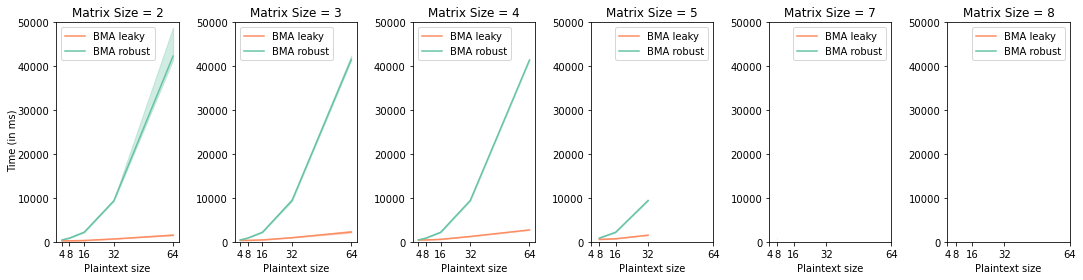

In [64]:

# result_path_bma = "/Users/sofianeazogagh/Desktop/revoLUT/resultats_bma.txt"
# results_bma = pd.read_csv(result_path_bma)

# result_path_bmawp = "/Users/sofianeazogagh/Desktop/revoLUT/resultats_bmawp.txt"
# results_bmawp = pd.read_csv(result_path_bmawp)

result_path_bma = "/Users/sofianeazogagh/Desktop/revoLUT/resultats_perf/resultats_bma.txt"
results_bma = pd.read_csv(result_path_bma)

result_path_bmawp = "/Users/sofianeazogagh/Desktop/revoLUT/resultats_perf/resultats_bmawp.txt"
results_bmawp = pd.read_csv(result_path_bmawp)

plot_time_vs_matrix_size_comp_for_3_carry_0(results_bma,results_bmawp)



plot_time_vs_matrix_size_comp(results_bma,results_bmawp)

plot_time_vs_params_comp(results_bma,results_bmawp)

# plot_time_vs_params(results)
# plot_time_vs_matrix_size(results)

In [1]:
def gini_coefficient(red, green):
    """
    Calcule le coefficient de Gini pour une distribution de boules rouges et vertes.

    Args:
        red (int): Nombre de boules rouges.
        green (int): Nombre de boules vertes.

    Returns:
        float: Coefficient de Gini (entre 0 et 1).
    """
    total = red + green
    if total == 0:
        return 0

    p_red = red / total
    p_green = green / total

    gini = 1 - (p_red**2 + p_green**2)
    return gini



In [22]:
# Exemple d'utilisation
rouges = 3
verts = 1
resultat_gini = gini_coefficient(rouges, verts)
print(f"Le coefficient de Gini est : {resultat_gini}")

Le coefficient de Gini est : 0.375


In [13]:
def gain_de_gini(T, T1, T2, Gini_T1, Gini_T2):
    """
    Calcule le gain de Gini pour un split donné.

    Args:
        T (int): Taille de l'ensemble parent.
        T1 (int): Taille de l'ensemble T1.
        T2 (int): Taille de l'ensemble T2.
        Gini_T (float): Indice de Gini de l'ensemble parent.
        Gini_T1 (float): Indice de Gini de l'ensemble T1.
        Gini_T2 (float): Indice de Gini de l'ensemble T2.

    Returns:
        float: Gain de Gini
    """
    return (T1 / T) * Gini_T1 + (T2 / T) * Gini_T2

In [21]:

T = 8

Gini_T1 = 0.24
T1 = 6

Gini_T2 = 0
T2 = T - T1


gain = gain_de_gini(T, T1, T2, Gini_T1, Gini_T2)
print(f"Le gain de Gini est : {gain}")

Le gain de Gini est : 0.18


In [28]:
def gain_de_gini(rouges_gauche, vert_gauche, rouges_droite, vert_droite):
    Gini_T1 = gini_coefficient(rouges_gauche,vert_gauche)
    print(f"Gini gauche = {Gini_T1}")
    Gini_T2 = gini_coefficient(rouges_droite,vert_droite)
    print(f"Gini droite = {Gini_T2}")
    T1 = rouges_gauche + vert_gauche
    print(f"T1 = {T1}")
    T2 = rouges_droite + vert_droite
    print(f"T2 = {T2}")
    T = T1 + T2
    print(f"T = {T}")
    return (T1 / T) * Gini_T1 + (T2 / T) * Gini_T2


In [46]:
rouges_gauche,vert_gauche = (0,1)
rouges_droite,vert_droite = (1,5)
gain = gain_de_gini(rouges_gauche,vert_gauche,rouges_droite,vert_droite)
print(f"Le gain de Gini est : {gain}")

Gini gauche = 0.0
Gini droite = 0.2777777777777777
T1 = 1
T2 = 6
T = 7
Le gain de Gini est : 0.238095238095238
